In [23]:
#!pip install optuna

In [24]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, accuracy_score, r2_score, f1_score,\
roc_auc_score,mean_absolute_error,mean_absolute_percentage_error,max_error
import optuna


In [25]:
data_fin_imprt=pd.read_csv("final.csv",  delimiter=',')


In [26]:

x=data_fin_imprt.drop('SalePrice',axis=1)
y=data_fin_imprt['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [27]:
rfr_mod = RandomForestRegressor(n_estimators=200,max_depth= 8, max_features=9)
rfr_mod.fit(x_train, y_train)
rfr_pred = rfr_mod.predict(x_test)


In [28]:
rfr_mod_sc=rfr_mod.score(x_train,y_train)
print('Random Forest Regression Model Score  : ',round(rfr_mod_sc,3))
r2=r2_score(y_test,rfr_pred)# computing and displaying the R.Sq of the model
print('R Sq. Value : ',round(r2,2))
rfr_adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-x.shape[1]-1)
print('Adjusted R Sq. Value is : ', round(rfr_adj_r2,3))
mean_sq=mean_squared_error(y_test,rfr_pred)# computing and displaying the Mean square error of the model
print('Mean Square Error is : ', round(mean_sq,3))
lin_mse=mean_squared_error(y_test,rfr_pred)
lin_rmse = np.sqrt(lin_mse)
print('Root Mean Square Error is : ', round(lin_rmse,3))
lin_mae=mean_absolute_error(y_test, rfr_pred)
print('Mean Absoulue Error is : ', round(lin_mae,3))
scores_cvs = cross_val_score(rfr_mod, x, y,scoring='r2' ,cv=5)
print("Accuracy :",round(scores_cvs.mean()*100,2),"%") # Accuracy of model

Random Forest Regression Model Score  :  0.882
R Sq. Value :  0.87
Adjusted R Sq. Value is :  0.851
Mean Square Error is :  0.025
Root Mean Square Error is :  0.158
Mean Absoulue Error is :  0.112
Accuracy : 82.21 %


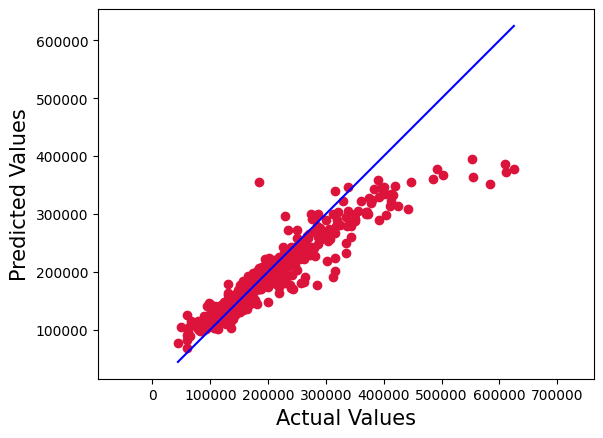

In [29]:


Actual_Price=np.expm1(y_test)
Predicted_Price=np.expm1(rfr_pred)
plt.scatter(Actual_Price, Predicted_Price, c='crimson')
p1 = max(max(Predicted_Price), max(Actual_Price))
p2 = min(min(Predicted_Price), min(Actual_Price))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

<ipython-input-30-d84020e93739>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot((y_test-rfr_pred),bins=100);


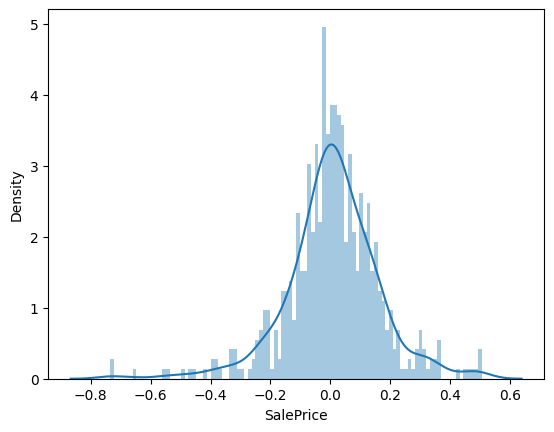

In [30]:
sb.distplot((y_test-rfr_pred),bins=100);

In [31]:
param_grid = {
    'n_estimators': [100,300,500],
    'max_depth' : [2,6,10],
    'max_features' : [1,5,9],
}

In [32]:
#rf with gridsearchcv parameters
rfr_mod = RandomForestRegressor(n_estimators=300,max_depth= 10, max_features=9)
rfr_mod.fit(x_train, y_train)
rfr_pred = rfr_mod.predict(x_test)

In [33]:
rfr_mod_sc=rfr_mod.score(x_train,y_train)
print('Random Forest Regression Model Score  : ',round(rfr_mod_sc,3))
r2=r2_score(y_test,rfr_pred)# computing and displaying the R.Sq of the model
print('R Sq. Value : ',round(r2,2))
rfr_adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-x.shape[1]-1)
print('Adjusted R Sq. Value is : ', round(rfr_adj_r2,3))
mean_sq=mean_squared_error(y_test,rfr_pred)# computing and displaying the Mean square error of the model
print('Mean Square Error is : ', round(mean_sq,3))
lin_mse=mean_squared_error(y_test,rfr_pred)
lin_rmse = np.sqrt(lin_mse)
print('Root Mean Square Error is : ', round(lin_rmse,3))
lin_mae=mean_absolute_error(y_test, rfr_pred)
print('Mean Absoulue Error is : ', round(lin_mae,3))
scores_cvs = cross_val_score(rfr_mod, x, y,scoring='r2' ,cv=5)
print("Accuracy :",round(scores_cvs.mean()*100,2),"%")
# Accuracy of moadel based on parameter supplied by GridsearchCV

Random Forest Regression Model Score  :  0.923
R Sq. Value :  0.89
Adjusted R Sq. Value is :  0.874
Mean Square Error is :  0.021
Root Mean Square Error is :  0.145
Mean Absoulue Error is :  0.102
Accuracy : 84.18 %


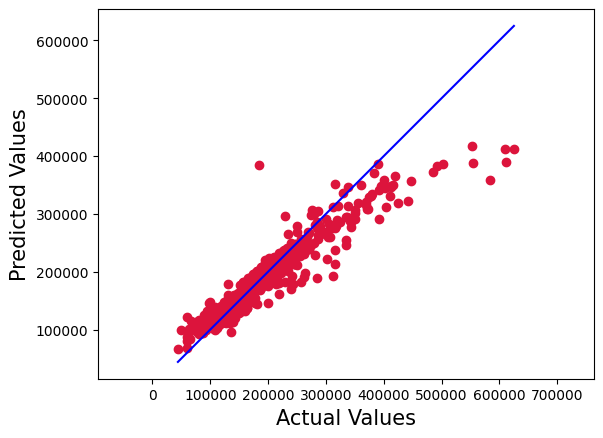

In [34]:
Actual_Price=np.expm1(y_test)
Predicted_Price=np.expm1(rfr_pred)
plt.scatter(Actual_Price, Predicted_Price, c='crimson')
p1 = max(max(Predicted_Price), max(Actual_Price))
p2 = min(min(Predicted_Price), min(Actual_Price))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

<ipython-input-35-d84020e93739>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot((y_test-rfr_pred),bins=100);


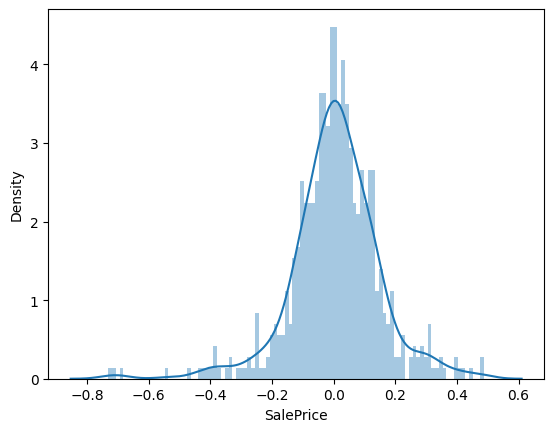

In [35]:
sb.distplot((y_test-rfr_pred),bins=100);

In [36]:
# rf optuna with same hyperparamter space as parent paper gridsearchcv
def objective(trial):
    # Define hyperparameter search space, could make bigger than original bc run time is more efficient, and add more parameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        #'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        #'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_int('max_features', 1 , 9)
    }

    # Train Random Forest model
    model = RandomForestRegressor(**params, n_jobs=-1, random_state= 42)
    model.fit(x_train, y_train)

    # Evaluate model
    preds = model.predict(x_test)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    return rmse

# Run Optuna optimization
study = optuna.create_study(direction='minimize')  # Minimize RMSE
study.optimize(objective, n_trials=50)

# Print best hyperparameters
print("Best RMSE:", study.best_value)
print("Best Hyperparameters:", study.best_params)


[I 2025-02-20 19:33:25,868] A new study created in memory with name: no-name-6005fb99-5bc2-46d7-b61d-3076d1d0719c
[I 2025-02-20 19:33:27,049] Trial 0 finished with value: 0.16609572901289324 and parameters: {'n_estimators': 237, 'max_depth': 10, 'max_features': 5}. Best is trial 0 with value: 0.16609572901289324.
[I 2025-02-20 19:33:27,750] Trial 1 finished with value: 0.1966587558577456 and parameters: {'n_estimators': 284, 'max_depth': 7, 'max_features': 5}. Best is trial 0 with value: 0.16609572901289324.
[I 2025-02-20 19:33:28,166] Trial 2 finished with value: 0.27711968786782004 and parameters: {'n_estimators': 179, 'max_depth': 6, 'max_features': 2}. Best is trial 0 with value: 0.16609572901289324.
[I 2025-02-20 19:33:29,164] Trial 3 finished with value: 0.15665913408654675 and parameters: {'n_estimators': 340, 'max_depth': 8, 'max_features': 9}. Best is trial 3 with value: 0.15665913408654675.
[I 2025-02-20 19:33:29,587] Trial 4 finished with value: 0.3400127537869212 and parame

Best RMSE: 0.14430587500293873
Best Hyperparameters: {'n_estimators': 360, 'max_depth': 10, 'max_features': 9}


Grid Search RF: {'max_depth': 10, 'max_features': 9, 'n_estimators': 300}


In [37]:
rfr_mod = RandomForestRegressor(n_estimators=434, max_depth= 10, max_features= 9)
rfr_mod.fit(x_train, y_train)
rfr_pred = rfr_mod.predict(x_test)

In [38]:
rfr_mod_sc=rfr_mod.score(x_train,y_train)
print('Random Forest Regression Model Score  : ',round(rfr_mod_sc,3))
r2=r2_score(y_test,rfr_pred)# computing and displaying the R.Sq of the model
print('R Sq. Value : ',round(r2,2))
rfr_adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-x.shape[1]-1)
print('Adjusted R Sq. Value is : ', round(rfr_adj_r2,3))
mean_sq=mean_squared_error(y_test,rfr_pred)# computing and displaying the Mean square error of the model
print('Mean Square Error is : ', round(mean_sq,3))
lin_mse=mean_squared_error(y_test,rfr_pred)
lin_rmse = np.sqrt(lin_mse)
print('Root Mean Square Error is : ', round(lin_rmse,3))
lin_mae=mean_absolute_error(y_test, rfr_pred)
print('Mean Absoulue Error is : ', round(lin_mae,3))
scores_cvs = cross_val_score(rfr_mod, x, y,scoring='r2' ,cv=5)
print("Accuracy :",round(scores_cvs.mean()*100,2),"%")
# Accuracy of moadel based on parameter supplied by GridsearchCV

Random Forest Regression Model Score  :  0.922
R Sq. Value :  0.89
Adjusted R Sq. Value is :  0.874
Mean Square Error is :  0.021
Root Mean Square Error is :  0.145
Mean Absoulue Error is :  0.102
Accuracy : 84.39 %


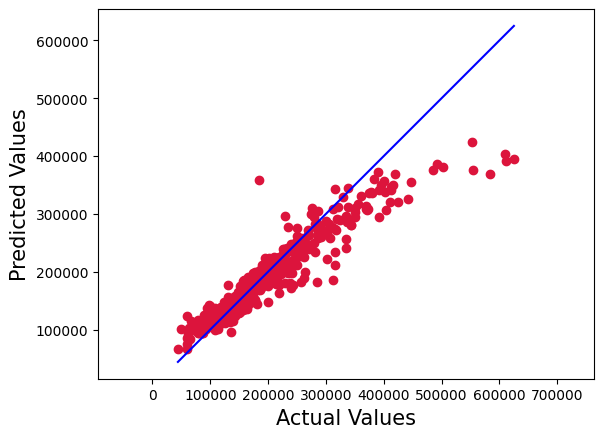

In [39]:
Actual_Price=np.expm1(y_test)
Predicted_Price=np.expm1(rfr_pred)
plt.scatter(Actual_Price, Predicted_Price, c='crimson')
p1 = max(max(Predicted_Price), max(Actual_Price))
p2 = min(min(Predicted_Price), min(Actual_Price))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

<ipython-input-40-d84020e93739>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot((y_test-rfr_pred),bins=100);


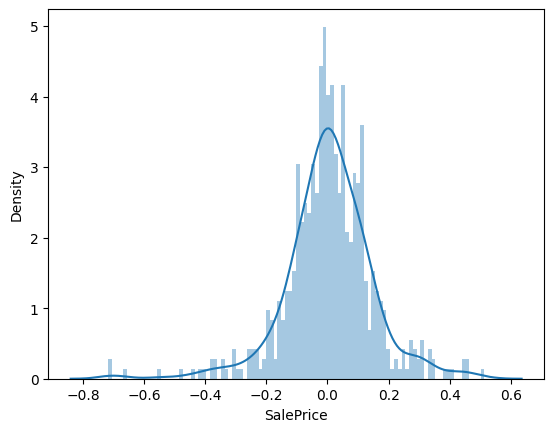

In [40]:
sb.distplot((y_test-rfr_pred),bins=100);

In [41]:
# rf optuna with bigger hyperparamter space
def objective(trial):
    # Define hyperparameter search space, could make bigger than original bc run time is more efficient, and add more parameters
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 1, 600),
        'max_depth': trial.suggest_int('max_depth', 1, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_int('max_features', 1 , 20)
    }

    # Train Random Forest model
    model = RandomForestRegressor(**params, n_jobs=-1, random_state= 42)
    model.fit(x_train, y_train)

    # Evaluate model
    preds = model.predict(x_test)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    return rmse

# Run Optuna optimization
study = optuna.create_study(direction='minimize')  # Minimize RMSE
study.optimize(objective, n_trials=50)

# Print best hyperparameters
print("Best RMSE:", study.best_value)
print("Best Hyperparameters:", study.best_params)


[I 2025-02-20 19:34:42,631] A new study created in memory with name: no-name-6b7017bd-f21a-48b6-8422-10a1b4c55d40
[I 2025-02-20 19:34:43,785] Trial 0 finished with value: 0.19414812813014531 and parameters: {'n_estimators': 419, 'max_depth': 13, 'min_samples_split': 10, 'min_samples_leaf': 17, 'max_features': 7}. Best is trial 0 with value: 0.19414812813014531.
[I 2025-02-20 19:34:44,609] Trial 1 finished with value: 0.3564240881237714 and parameters: {'n_estimators': 395, 'max_depth': 1, 'min_samples_split': 11, 'min_samples_leaf': 9, 'max_features': 7}. Best is trial 0 with value: 0.19414812813014531.
[I 2025-02-20 19:34:46,126] Trial 2 finished with value: 0.13245190458317216 and parameters: {'n_estimators': 357, 'max_depth': 11, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 17}. Best is trial 2 with value: 0.13245190458317216.
[I 2025-02-20 19:34:46,802] Trial 3 finished with value: 0.15822753981355026 and parameters: {'n_estimators': 208, 'max_depth': 20, 'min_sam

Best RMSE: 0.12447976974480483
Best Hyperparameters: {'n_estimators': 347, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 19}


In [42]:
rfr_mod = RandomForestRegressor(n_estimators=379, max_depth= 13, min_samples_split = 8, min_samples_leaf = 1, max_features= 20)
rfr_mod.fit(x_train, y_train)
rfr_pred = rfr_mod.predict(x_test)

In [43]:
rfr_mod_sc=rfr_mod.score(x_train,y_train)
print('Random Forest Regression Model Score  : ',round(rfr_mod_sc,3))
r2=r2_score(y_test,rfr_pred)# computing and displaying the R.Sq of the model
print('R Sq. Value : ',round(r2,2))
rfr_adj_r2 = 1 - (1-r2) * (len(y)-1)/(len(y)-x.shape[1]-1)
print('Adjusted R Sq. Value is : ', round(rfr_adj_r2,3))
mean_sq=mean_squared_error(y_test,rfr_pred)# computing and displaying the Mean square error of the model
print('Mean Square Error is : ', round(mean_sq,3))
lin_mse=mean_squared_error(y_test,rfr_pred)
lin_rmse = np.sqrt(lin_mse)
print('Root Mean Square Error is : ', round(lin_rmse,3))
lin_mae=mean_absolute_error(y_test, rfr_pred)
print('Mean Absoulue Error is : ', round(lin_mae,3))
scores_cvs = cross_val_score(rfr_mod, x, y,scoring='r2' ,cv=5)
print("Accuracy :",round(scores_cvs.mean()*100,2),"%")
# Accuracy of moadel based on parameter supplied by GridsearchCV

Random Forest Regression Model Score  :  0.952
R Sq. Value :  0.92
Adjusted R Sq. Value is :  0.907
Mean Square Error is :  0.016
Root Mean Square Error is :  0.125
Mean Absoulue Error is :  0.085
Accuracy : 87.64 %


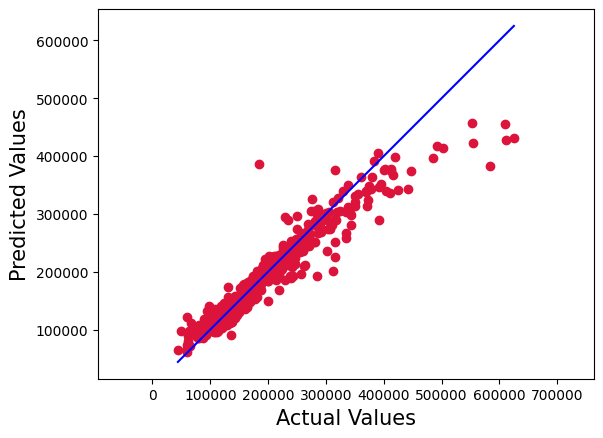

In [44]:
Actual_Price=np.expm1(y_test)
Predicted_Price=np.expm1(rfr_pred)
plt.scatter(Actual_Price, Predicted_Price, c='crimson')
p1 = max(max(Predicted_Price), max(Actual_Price))
p2 = min(min(Predicted_Price), min(Actual_Price))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

<ipython-input-45-d84020e93739>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot((y_test-rfr_pred),bins=100);


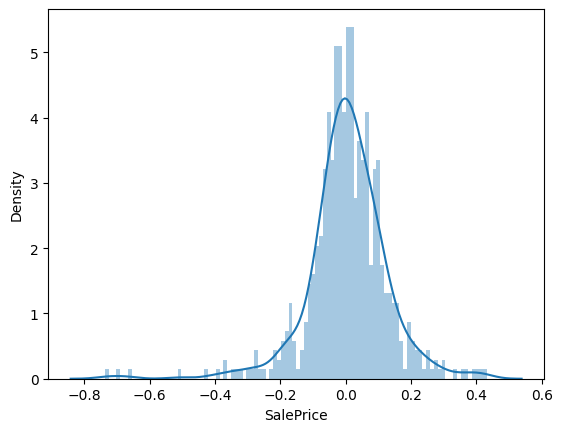

In [45]:
sb.distplot((y_test-rfr_pred),bins=100);